In [19]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/airline_passenger_satisfaction.csv")

print("Dataset Preview:")
df.head()

Dataset Preview:


,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [4]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking 

In [5]:
df['Arrival Delay'].fillna(df['Arrival Delay'].mean(), inplace=True)
print("✅ Missing values in 'Arrival Delay' filled successfully!")

✅ Missing values in 'Arrival Delay' filled successfully!


C:\Users\HP\AppData\Local\Temp\ipykernel_19092\634956397.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay'].fillna(df['Arrival Delay'].mean(), inplace=True)


In [8]:
df['Arrival Delay'].isnull().sum()

np.int64(0)

In [9]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()
    print("✅ Duplicates removed!")
else:
    print("✅ No duplicates found!")

Number of duplicate rows: 0
✅ No duplicates found!


In [10]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("✅ Column names cleaned:")
print(df.columns.tolist())

✅ Column names cleaned:
['id', 'gender', 'age', 'customer_type', 'type_of_travel', 'class', 'flight_distance', 'departure_delay', 'arrival_delay', 'departure_and_arrival_time_convenience', 'ease_of_online_booking', 'check-in_service', 'online_boarding', 'gate_location', 'on-board_service', 'seat_comfort', 'leg_room_service', 'cleanliness', 'food_and_drink', 'in-flight_service', 'in-flight_wifi_service', 'in-flight_entertainment', 'baggage_handling', 'satisfaction']


In [11]:
df.to_csv("../cleaned_data/cleaned_airline_data.csv", index=False)
print("✅ Cleaned dataset saved successfully in the 'cleaned_data' folder!")

✅ Cleaned dataset saved successfully in the 'cleaned_data' folder!


In [12]:
print(df.info())
print("\nMissing values after cleaning:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   id                                      129880 non-null  int64  
 1   gender                                  129880 non-null  object 
 2   age                                     129880 non-null  int64  
 3   customer_type                           129880 non-null  object 
 4   type_of_travel                          129880 non-null  object 
 5   class                                   129880 non-null  object 
 6   flight_distance                         129880 non-null  int64  
 7   departure_delay                         129880 non-null  int64  
 8   arrival_delay                           129880 non-null  float64
 9   departure_and_arrival_time_convenience  129880 non-null  int64  
 10  ease_of_online_booking                  1298

# Exploratory Data Analysis

In [13]:
# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Set visualization style for better aesthetics
sns.set(style="whitegrid")

In [15]:
# Display plots inline (inside Jupyter)
%matplotlib inline

In [17]:
# View the first few rows
df.head()

print("Unique satisfaction levels:", df['satisfaction'].unique())

Unique satisfaction levels: ['Neutral or Dissatisfied' 'Satisfied']


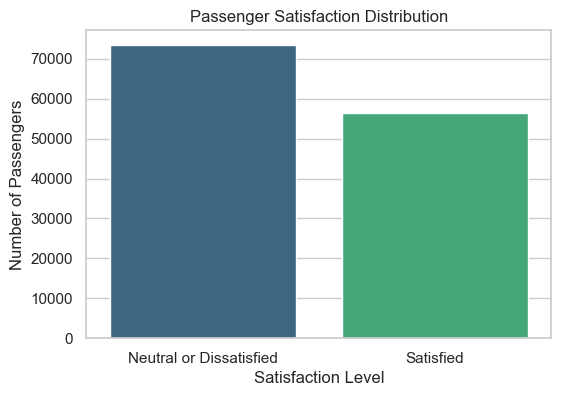

In [21]:
# Count of satisfaction levels
plt.figure(figsize=(6,4))
sns.countplot(x='satisfaction', data=df, palette='viridis')
plt.title("Passenger Satisfaction Distribution")
plt.xlabel("Satisfaction Level")
plt.ylabel("Number of Passengers")
plt.show()

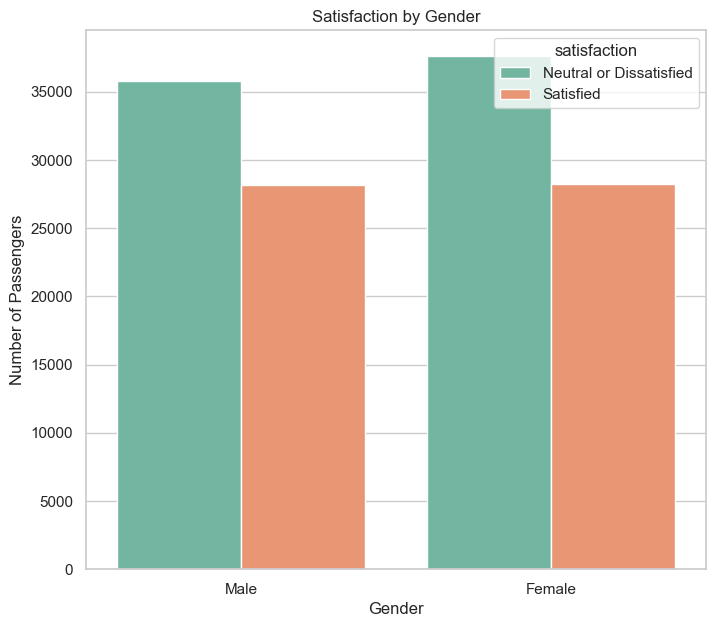

In [25]:
plt.figure(figsize=(8,7))
sns.countplot(x='gender', hue='satisfaction', data=df, palette='Set2')
plt.title("Satisfaction by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.show()

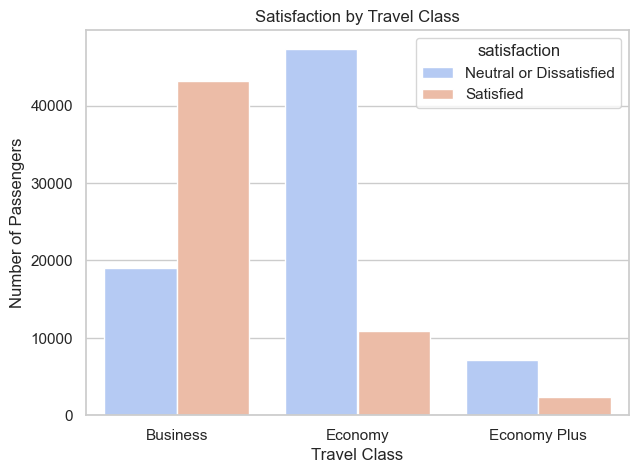

In [26]:
plt.figure(figsize=(7,5))
sns.countplot(x='class', hue='satisfaction', data=df, palette='coolwarm')
plt.title("Satisfaction by Travel Class")
plt.xlabel("Travel Class")
plt.ylabel("Number of Passengers")
plt.show()

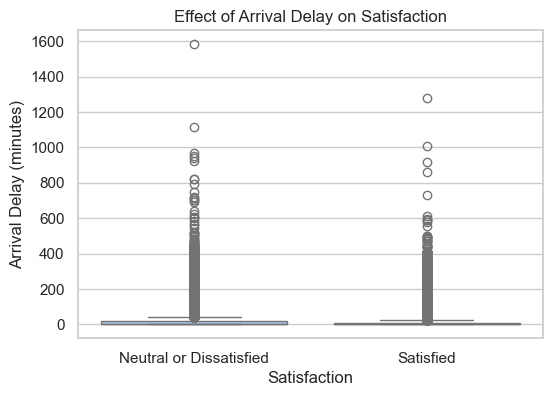

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(x='satisfaction', y='arrival_delay', data=df, palette='pastel')
plt.title("Effect of Arrival Delay on Satisfaction")
plt.xlabel("Satisfaction")
plt.ylabel("Arrival Delay (minutes)")
plt.show()

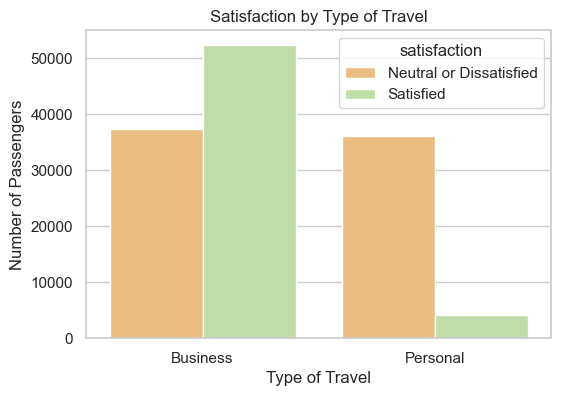

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(x='type_of_travel', hue='satisfaction', data=df, palette='Spectral')
plt.title("Satisfaction by Type of Travel")
plt.xlabel("Type of Travel")
plt.ylabel("Number of Passengers")
plt.show()

In [30]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

<Figure size 1000x600 with 0 Axes>

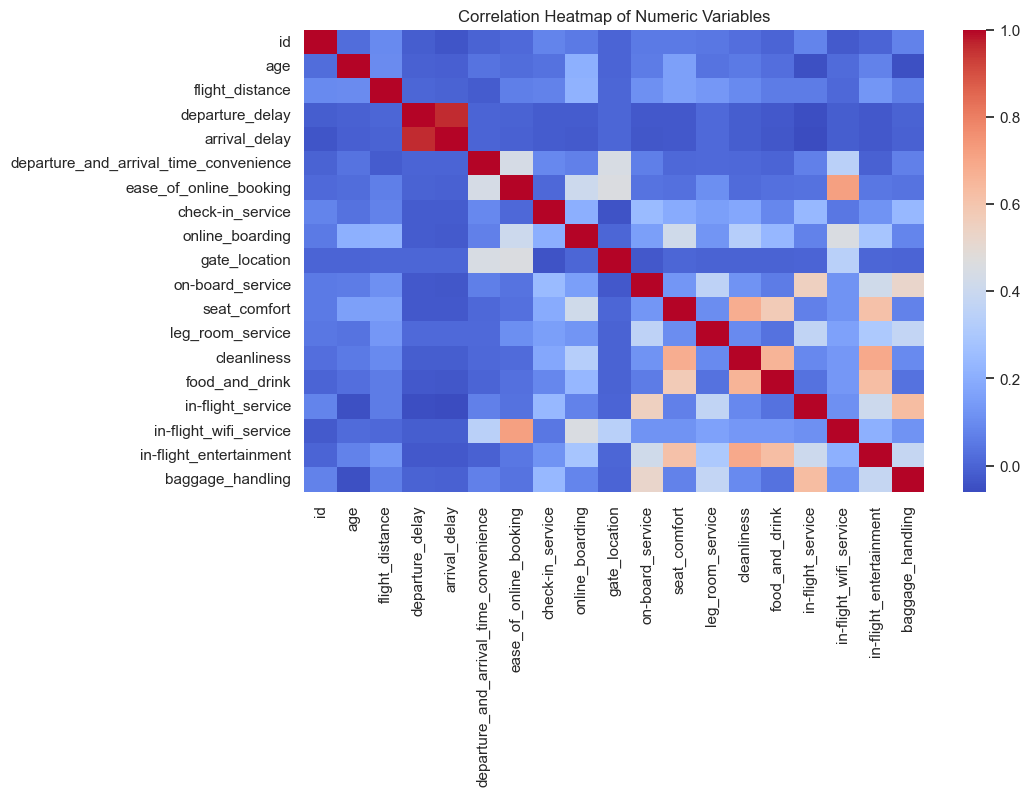

In [31]:
# Create correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()